In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
import circlify

from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt import HRPOpt

c:\Users\jyin1\AppData\Local\Programs\Python\Python311\Lib\site-packages\pypfopt\hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.92269131 0.92269131 0.92269131 0.92269131 0.92269131 0.92269131
 0.92269131]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


Expected annual return: 18.8%
Annual volatility: 10.9%
Sharpe Ratio: 1.55
{'10Y Bond': 0.005504292045187562, '2Y Bond': 0.003411491426056471, 'Copper': 0.01516607698076126, 'Crude Oil': 0.013112389881139159, 'EUR/USD': 0.4538083195572509, 'GHYG': 0.022113392520257843, 'Iron Ore': 0.07917856362544536, 'NLR': 0.008082273378763768, 'SOXX': 0.004904701934608346, 'Soybean': 0.05132612181814323, 'USD/JPY': 0.3163501358208483, 'VFH': 0.004794864939568839, 'VTV': 0.00891171652872957, 'VWO': 0.013335659543239354}


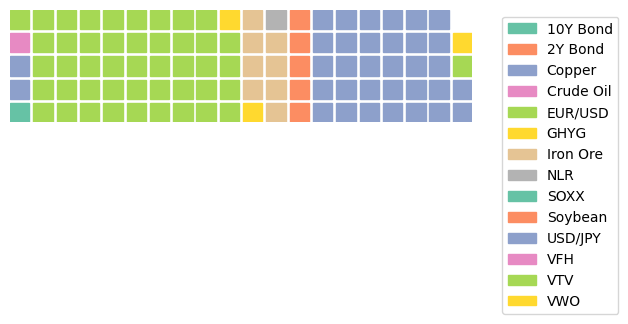

In [15]:
portfolio = pd.read_excel('all_data.xlsx')

# HRP Method
returns = portfolio.pct_change().dropna()
# mu = mean_historical_return(returns)
# S = CovarianceShrinkage(returns).ledoit_wolf()
hrp = HRPOpt(returns)
hrp_weights = hrp.optimize()
hrp.portfolio_performance(verbose=True)
print(dict(hrp_weights))

# # Basic waffle
# plt.figure(
#     FigureClass=Waffle,
#     rows=5,
#     columns=20,
#     values=hrp_weights,
#     legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
# )
# plt.show()

In [25]:
weights = {'10Y Bond': 0.005504292045187562, 
            '2Y Bond': 0.003411491426056471, 
            'Copper': 0.01516607698076126, 
            'Crude Oil': 0.013112389881139159, 
            'EUR/USD': 0.4538083195572509, 
            'GHYG': 0.022113392520257843, 
            'Iron Ore': 0.07917856362544536, 
            'NLR': 0.008082273378763768, 
            'SOXX': 0.004904701934608346, 
            'Soybean': 0.05132612181814323, 
            'USD/JPY': 0.3163501358208483, 
            'VFH': 0.004794864939568839, 
            'VTV': 0.00891171652872957, 
            'VWO': 0.013335659543239354
}

tiered_weights = [{ 'id': 'Portfolio', 'datum': 1.0, 'children' : [
                        {'id': 'Fixed Income', 'datum': 0.03102917599, 
                    'children' : [
                                    {'id':'10Y Bond', 'datum': 0.005504292045187562}, 
                                    {'id': '2Y Bond', 'datum': 0.003411491426056471}, 
                                    {'id': 'GHYG', 'datum': 0.022113392520257843}
                                ]},
                    {'id': 'Commodities', 'datum': 0.1587831523, 
                    'children' : [
                                    {'id': 'Copper', 'datum': 0.01516607698076126}, 
                                    {'id': 'Crude Oil', 'datum': 0.013112389881139159}, 
                                    {'id': 'Iron Ore', 'datum': 0.07917856362544536}, 
                                    {'id': 'Soybeans', 'datum': 0.05132612181814323}
                                ]},
                    {'id': 'Foreign Exchange', 'datum': 0.7701584554, 
                    'children' : [
                                    {'id': 'EUR/USD', 'datum': 0.4538083195572509}, 
                                    {'id': 'USD/JPY', 'datum': 0.3163501358208483}
                                ]},
                    {'id': 'Equities', 'datum': 0.04002921632, 
                    'children' : [
                                    {'id': 'NLR', 'datum': 0.008082273378763768}, 
                                    {'id': 'SOXX', 'datum': 0.004904701934608346}, 
                                    {'id': 'VFH', 'datum': 0.004794864939568839}, 
                                    {'id': 'VTV', 'datum': 0.00891171652872957}, 
                                    {'id': 'VWO', 'datum': 0.013335659543239354}
                                ]}
                    ]}]

Circle(x=0.0, y=0.0, r=1.0, level=1, ex={'id': 'Portfolio', 'datum': 1.0, 'children': [{'id': 'Fixed Income', 'datum': 0.03102917599, 'children': [{'id': '10Y Bond', 'datum': 0.005504292045187562}, {'id': '2Y Bond', 'datum': 0.003411491426056471}, {'id': 'GHYG', 'datum': 0.022113392520257843}]}, {'id': 'Commodities', 'datum': 0.1587831523, 'children': [{'id': 'Copper', 'datum': 0.01516607698076126}, {'id': 'Crude Oil', 'datum': 0.013112389881139159}, {'id': 'Iron Ore', 'datum': 0.07917856362544536}, {'id': 'Soybeans', 'datum': 0.05132612181814323}]}, {'id': 'Foreign Exchange', 'datum': 0.7701584554, 'children': [{'id': 'EUR/USD', 'datum': 0.4538083195572509}, {'id': 'USD/JPY', 'datum': 0.3163501358208483}]}, {'id': 'Equities', 'datum': 0.04002921632, 'children': [{'id': 'NLR', 'datum': 0.008082273378763768}, {'id': 'SOXX', 'datum': 0.004904701934608346}, {'id': 'VFH', 'datum': 0.004794864939568839}, {'id': 'VTV', 'datum': 0.00891171652872957}, {'id': 'VWO', 'datum': 0.01333565954323935

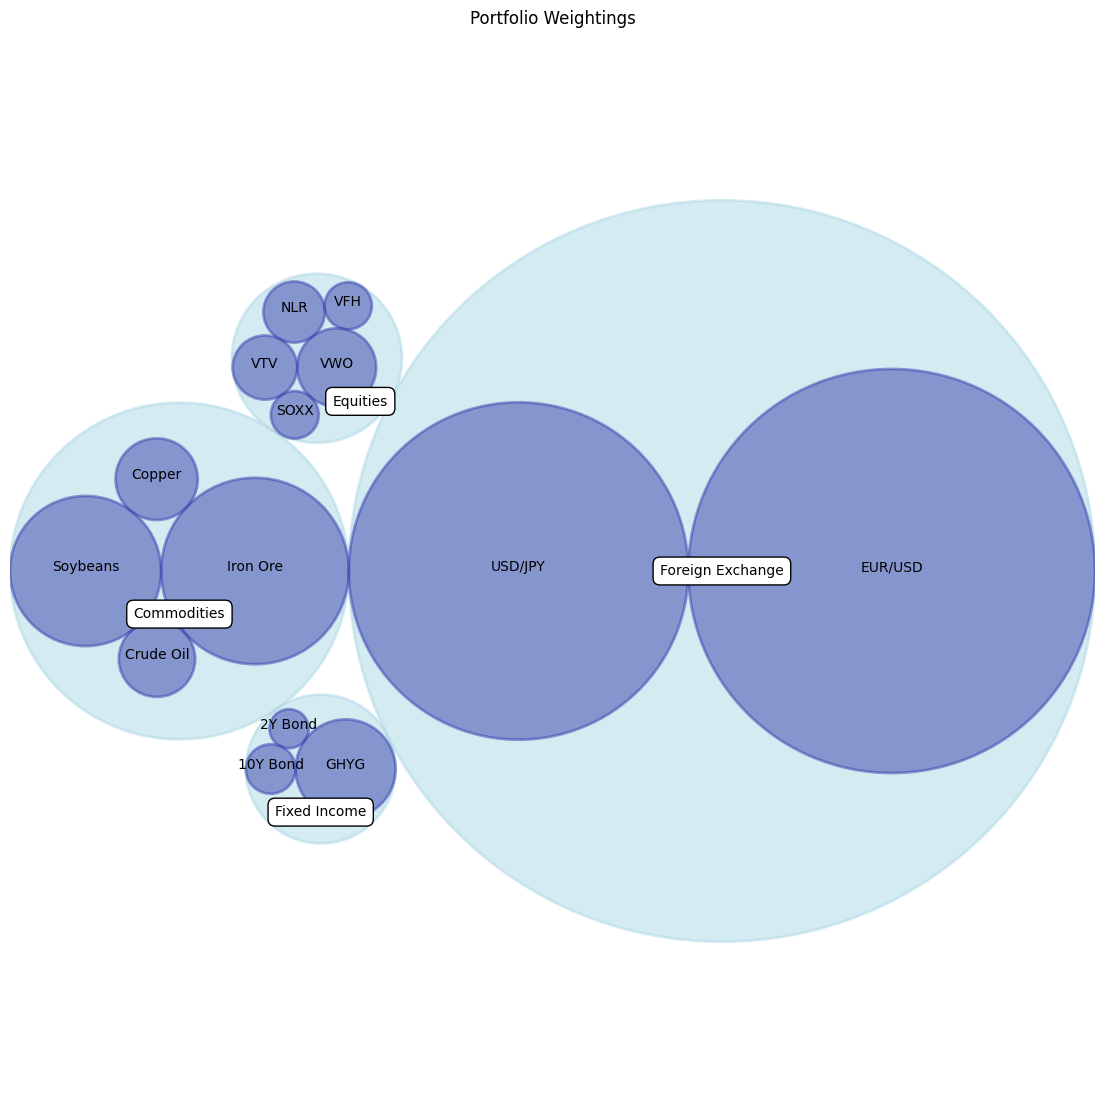

In [50]:
# create circle plot

circles = circlify.circlify(
    tiered_weights,
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

for circle in circles:
    print(circle)

# configure data plot
fig, ax = plt.subplots(figsize=(14, 14))
ax.set_title('Portfolio Weightings')
ax.axis('off')
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

for circle in circles:
    if circle.level != 2:
        continue
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.5,
                    linewidth=2, color="lightblue"))

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
        continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch(plt.Circle((x, y), r, alpha=0.5,
                    linewidth=2, color=(55/255, 66/255, 174/255)))
    plt.annotate(label, (x, y), ha='center', color="black")

# Labels for the asset classes
for circle in circles:
    if circle.level != 2:
        continue
    x, y, r = circle
    label = circle.ex["id"]
    pos = [x, y]
    if label == "Equities":
        pos = [x + 0.08, y - 0.08]
    elif label == "Fixed Income":
        pos = [x, y - 0.08]
    elif label == "Commodities":
        pos = [x, y - 0.08]
    plt.annotate(label, (pos[0], pos[1]), va='center', ha='center', bbox=dict(
        facecolor='white', edgecolor='black', boxstyle='round', pad=.5))

In [46]:
data =  [ {'id': 'Fixed Income', 'datum': 0.03102917599, 
                    'children' : [
                                    {'id':'10Y Bond', 'datum': 0.005504292045187562}, 
                                    {'id': '2Y Bond', 'datum': 0.003411491426056471}, 
                                    {'id': 'GHYG', 'datum': 0.022113392520257843}
                                ]},
                    {'id': 'Commodities', 'datum': 0.1587831523, 
                    'children' : [
                                    {'id': 'Copper', 'datum': 0.01516607698076126}, 
                                    {'id': 'Crude Oil', 'datum': 0.013112389881139159}, 
                                    {'id': 'Iron Ore', 'datum': 0.07917856362544536}, 
                                    {'id': 'Soybeans', 'datum': 0.05132612181814323}
                                ]},
                    {'id': 'Foreign Exchange', 'datum': 0.7701584554, 
                    'children' : [
                                    {'id': 'EUR/USD', 'datum': 0.4538083195572509}, 
                                    {'id': 'USD/JPY', 'datum': 0.3163501358208483}
                                ]},
                    {'id': 'Equities', 'datum': 0.04002921632, 
                    'children' : [
                                    {'id': 'NLR', 'datum': 0.008082273378763768}, 
                                    {'id': 'SOXX', 'datum': 0.004904701934608346}, 
                                    {'id': 'VFH', 'datum': 0.004794864939568839}, 
                                    {'id': 'VTV', 'datum': 0.00891171652872957}, 
                                    {'id': 'VWO', 'datum': 0.013335659543239354}
                                ]}]

['10Y Bond', '2Y Bond', 'GHYG']
[0.005504292045187562, 0.003411491426056471, 0.022113392520257843]
['Copper', 'Crude Oil', 'Iron Ore', 'Soybeans']
[0.01516607698076126, 0.013112389881139159, 0.07917856362544536, 0.05132612181814323]
['EUR/USD', 'USD/JPY']
[0.4538083195572509, 0.3163501358208483]
['NLR', 'SOXX', 'VFH', 'VTV', 'VWO']
[0.008082273378763768, 0.004904701934608346, 0.004794864939568839, 0.00891171652872957, 0.013335659543239354]


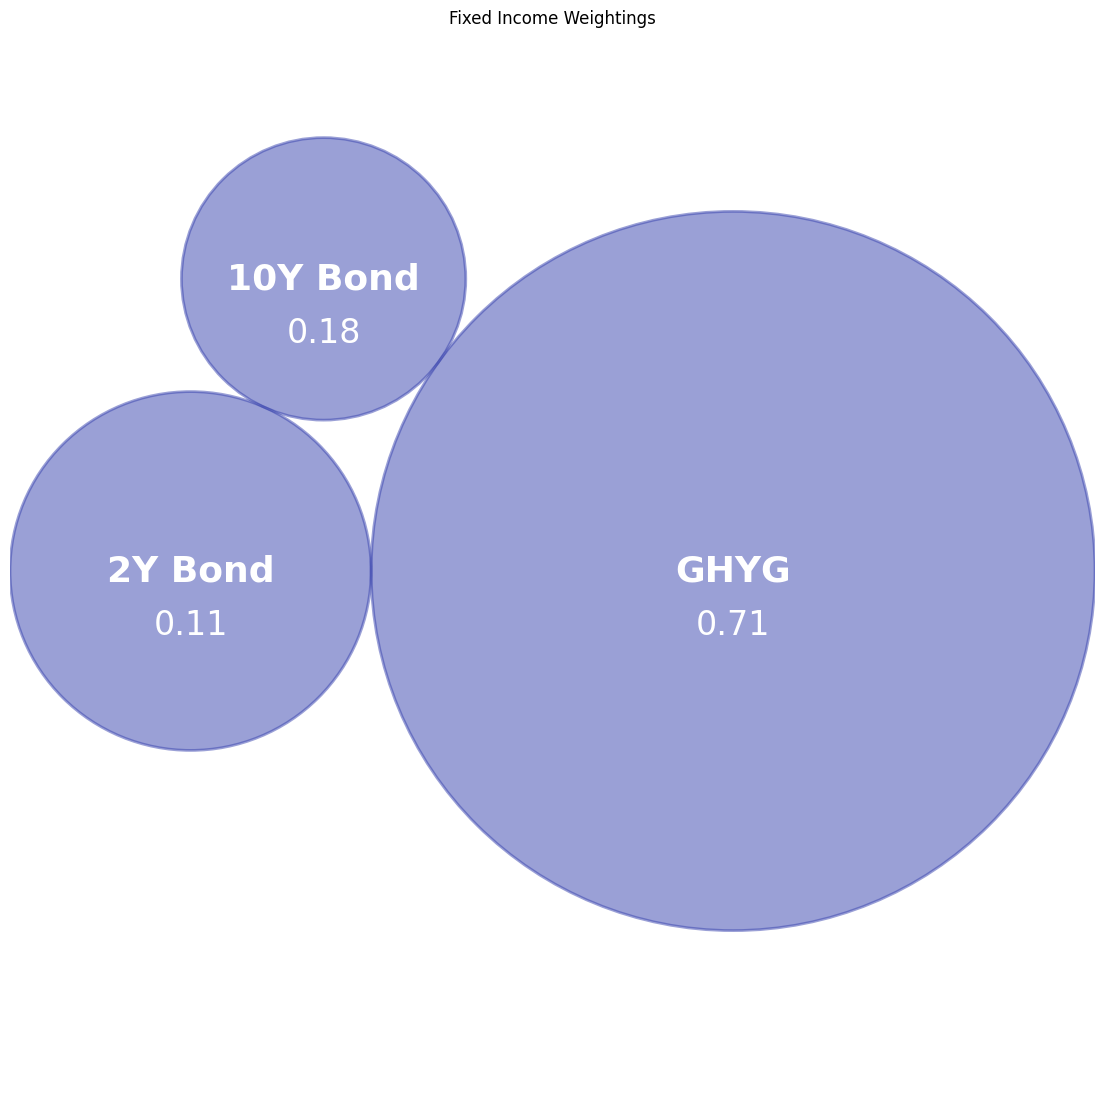

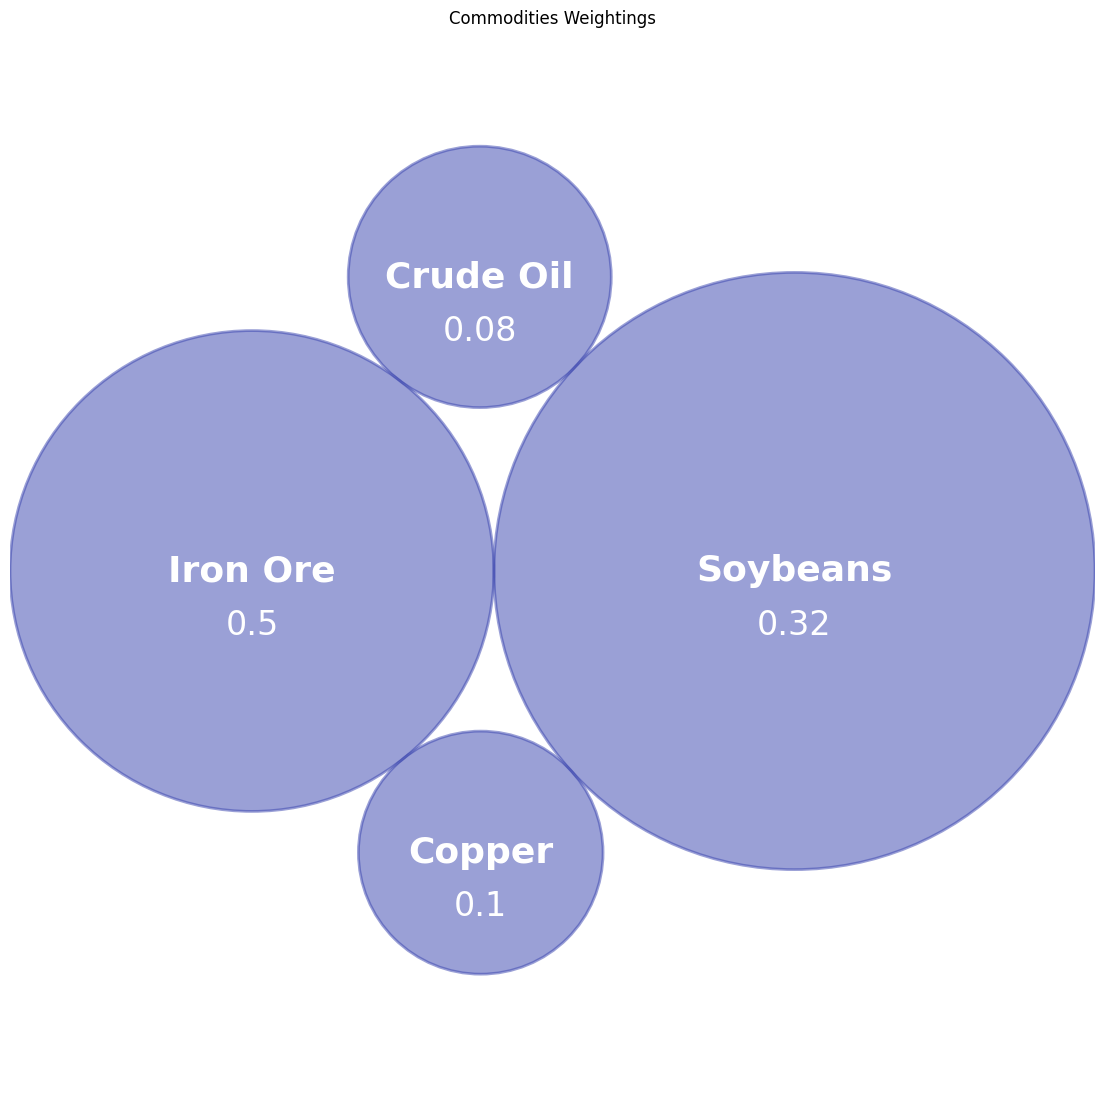

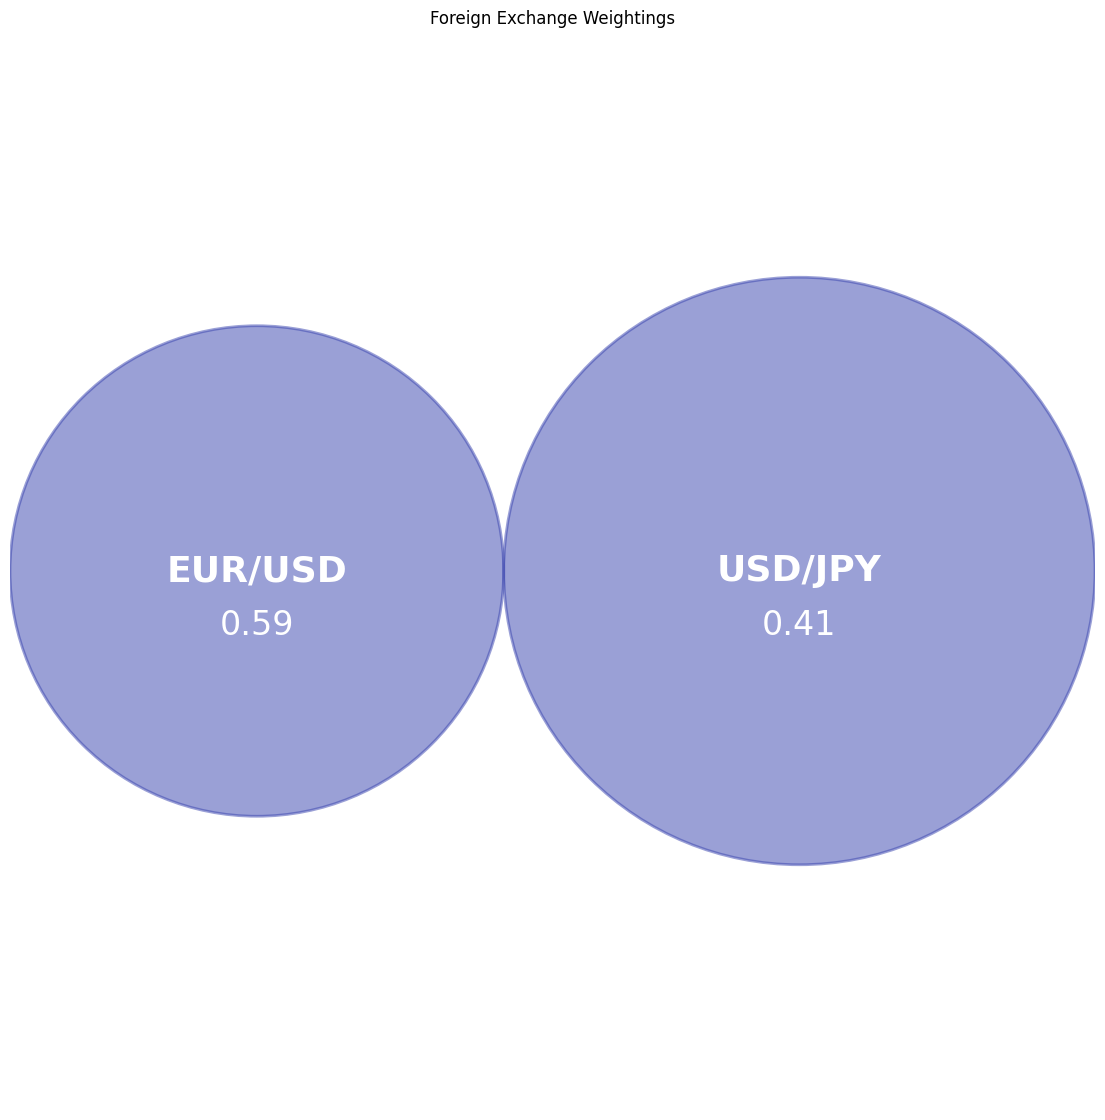

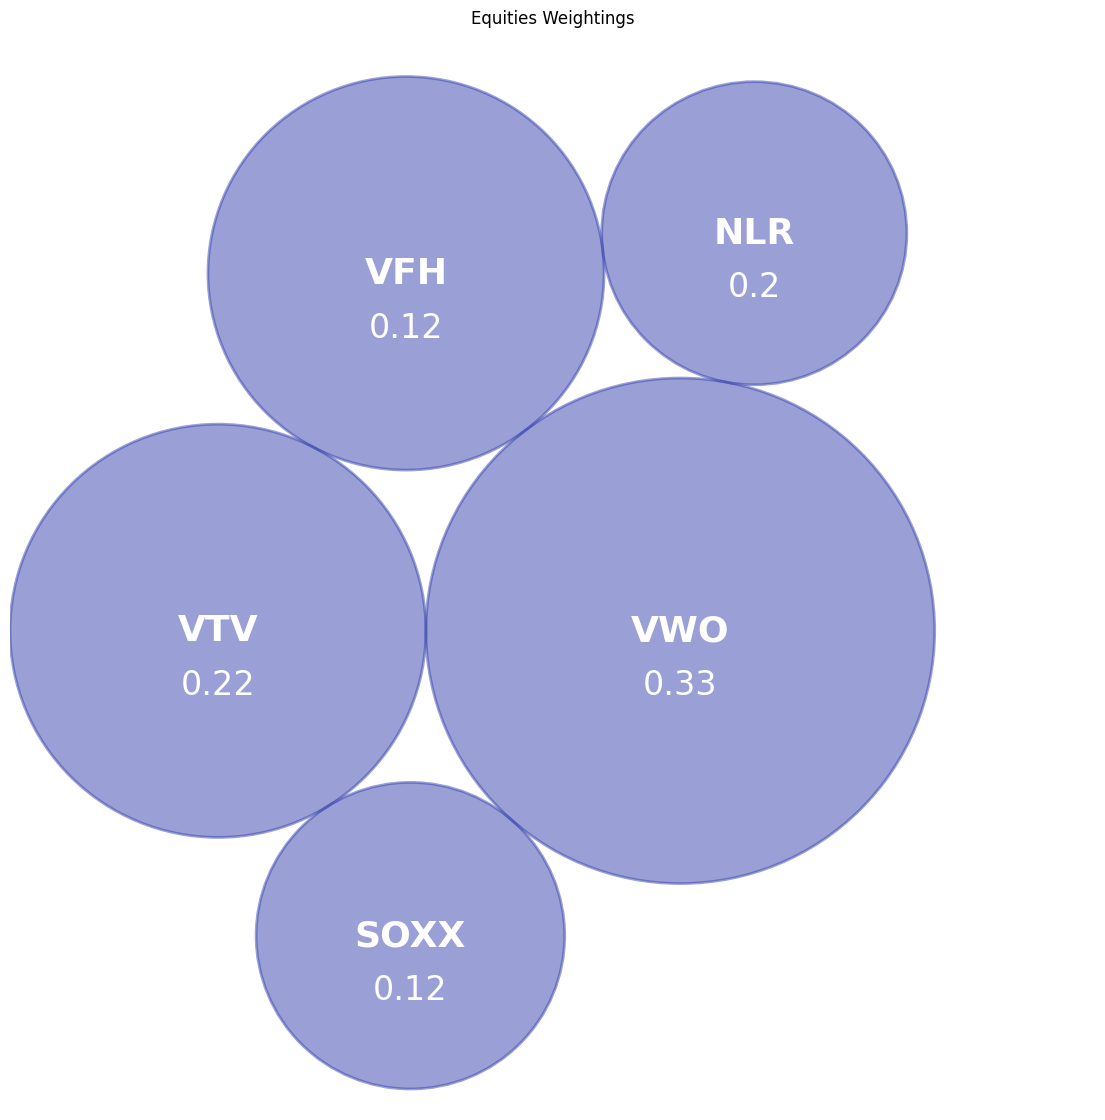

In [78]:
# create circle plot

for asset_class in data:
    child_data = asset_class['children']
    overall_weight = asset_class['datum']
    names = []
    values = []
    weights = []
    for asset in child_data:
        names.append(asset['id'])
        values.append(asset['datum'])
        weights.append(round(asset['datum'] / overall_weight, 2))
    print(names)
    print(values)
    circles = circlify.circlify(
        values,
        show_enclosure=False,
        target_enclosure=circlify.Circle(x=0, y=0, r=1)
    )
    # configure data plot
    fig, ax = plt.subplots(figsize=(14, 14))
    ax.set_title(f'{asset_class["id"]} Weightings')
    ax.axis('off')
    lim = max(
        max(
            abs(circle.x) + circle.r,
            abs(circle.y) + circle.r,
        )
        for circle in circles
    )
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)

    for circle, label, weight in zip(circles, names, weights):
        x, y, r = circle
        ax.add_patch(plt.Circle((x, y), r, alpha=0.5,
                    linewidth=2, color=(55/255, 66/255, 174/255), fill=True))
        plt.annotate(
            label,
            (x, y),
            va='center',
            ha='center',
            color='white',  
            fontsize=26,    
            fontweight='bold',
        )
        plt.annotate(
            weight,
            (x, y - 0.1),
            va='center',
            ha='center',
            color='white',  
            fontsize=24,    
        )

In [ ]:
import numpy as np

def _get_cluster_var(cov, cluster_items):
    # Compute variance per cluster
    cov_slice = cov.loc[cluster_items, cluster_items]
    weights = 1 / np.diag(cov_slice)  # Inverse variance weights
    weights /= weights.sum()
    return np.linalg.multi_dot((weights, cov_slice, weights))